#### Derivation from a point charge vector field $ (\vec{F} = \vec{E}q) $

$ \implies \vec{E} = \frac{\vec{F}}{q_0} = \frac{1}{4\pi\epsilon_0}\frac{q}{r^2}\hat{r} $

In the dipole, two particles of equal and opposite charges, $ -q $ and $ +q $, are located on $ x = -a $ and $ x = +a $ respectively. The charges are separated by a distance at a flat angle, $ r_{+q} = x - a $ and $ r_{-q} = x + a $.

$$ \vec{E}_1 = \frac{1}{4\pi\epsilon_0}\frac{q}{{r_1}^2}(cos\theta_1\hat{i} + sin\theta_1\hat{j}) = \frac{1}{4\pi\epsilon_0}\frac{q}{(x-a)^2}\hat{i}
\\ \vec{E}_2 = \frac{1}{4\pi\epsilon_0}\frac{q}{{r_2}^2}(cos\theta_2\hat{i} + sin\theta_2\hat{j}) = \frac{1}{4\pi\epsilon_0}\frac{q}{(x+a)^2}\hat{i} $$
*$ cos\theta_n = \frac{x \pm a}{r_n} $

#### Calculating the electric field of an electrostatic dipole for the axial and equatorial cases:

In [116]:
import numpy as np
import matplotlib.pyplot as plt


def E(q, a, x, y):
    
    kq = q / (4 * np.pi * 8.85E-12)
    r1 = np.sqrt((x - a / 2) ** 2 + y ** 2)
    r2 = np.sqrt((x + a / 2) ** 2 + y ** 2)
    E_x = kq * (x - a / 2) / (r1 ** 3) - (x + a / 2) / (r2 ** 3)
    E_y = kq * ((y / r1) ** 3 - (y / r2) ** 3)
    print(f"Ex = {E_x} and Ey = {E_y}. Net electric field = {E_x}i\u0302 + {E_y} j\u0302")
    
    return E_x, E_y

In [117]:
axial = E(1E-9, 0.10, 0.01, 0)
equatorial = E(1E-9, 0.10, 0, 0.01)

Ex = -5897.655711813629 and Ey = 0.0. Net electric field = -5897.655711813629î + 0.0 ĵ
Ex = -3768.3733071779643 and Ey = 0.0. Net electric field = -3768.3733071779643î + 0.0 ĵ


The function takes in four arguments, q ($ \mu C $), a, x, and y (m), where q is the magnitude of both of the charges in Coulombs, a is the distance between both charges, and x and y are the coordinates of the charges. We can compare our calculations with the equations for the electric dipole at the axial and equatorial points.

By the Principle of Superposition,
$ \sum_{i = 1}^{N}\vec{E}_x = \frac{q}{4\pi\epsilon_0}\left[\frac{1}{(x-a)^2}-\frac{1}{(x+a)^2}\right]\hat{i} = \frac{q}{4\pi\epsilon_0}\left(\frac{4ax}{x^4(1-\frac{a^4}{x^4}}\right)\hat{i} \\ $ 
The distance between the charges converges to 0 $ (x >> a) $.

$$ \therefore \vec{E}_{axial} = \frac{q}{4\pi\epsilon_0}\frac{2qa}{x^3}\hat{i} \\
\vec{E}_{equatorial} = \frac{-1}{4\pi\epsilon_0}\frac{qa}{x^3}\hat{i} $$

#### Visualization on a 2D plane using streamplot and quiver function:

[[0.03076923 0.0380833  0.04578133 ... 0.04578133 0.0380833  0.03076923]
 [0.02633648 0.03383006 0.04173772 ... 0.04173772 0.03383006 0.02633648]
 [0.02149454 0.02916238 0.0372766  ... 0.0372766  0.02916238 0.02149454]
 ...
 [0.02149454 0.02916238 0.0372766  ... 0.0372766  0.02916238 0.02149454]
 [0.02633648 0.03383006 0.04173772 ... 0.04173772 0.03383006 0.02633648]
 [0.03076923 0.0380833  0.04578133 ... 0.04578133 0.0380833  0.03076923]] [[-0.24615385 -0.25030324 -0.25425664 ...  0.25425664  0.25030324
   0.24615385]
 [-0.25335991 -0.25790629 -0.26226003 ...  0.26226003  0.25790629
   0.25335991]
 [-0.26072798 -0.26570169 -0.27048782 ...  0.27048782  0.26570169
   0.26072798]
 ...
 [ 0.26072798  0.26570169  0.27048782 ... -0.27048782 -0.26570169
  -0.26072798]
 [ 0.25335991  0.25790629  0.26226003 ... -0.26226003 -0.25790629
  -0.25335991]
 [ 0.24615385  0.25030324  0.25425664 ... -0.25425664 -0.25030324
  -0.24615385]]


Text(0.5, 1.0, 'Electric Dipole Field')

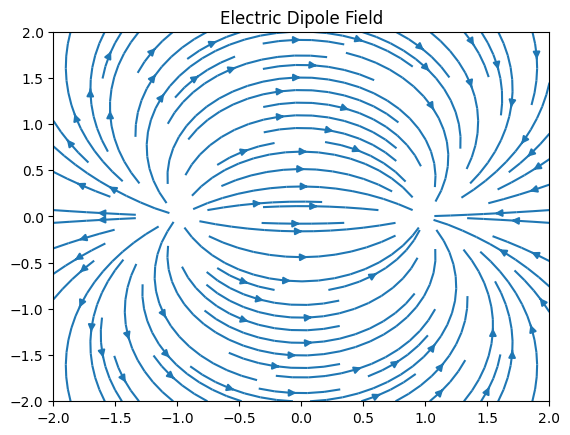

In [118]:
vpoints = 85
x_range = np.linspace(-2, 2,  vpoints)
y_range = x_range
x, y = np.meshgrid(x_range, y_range)

a = 1 # distance between charges

if np.logical_or(x != -1, x != 1).any():
    Ex1 = (x + a) / ((x + a) ** 2 + y ** 2)
    Ey1 = y / ((x + a) ** 2 + y ** 2)
    Ex2 = - (x - a) / ((x - 1) ** 2 + y ** 2)
    Ey2 = - y / ((x - a) ** 2 + y ** 2)

    Ex = Ex1 + Ex2
    Ey = Ey1 + Ey2

print(Ex, Ey)

plt.streamplot(x, y, Ex, Ey)
plt.title('Electric Dipole Field')

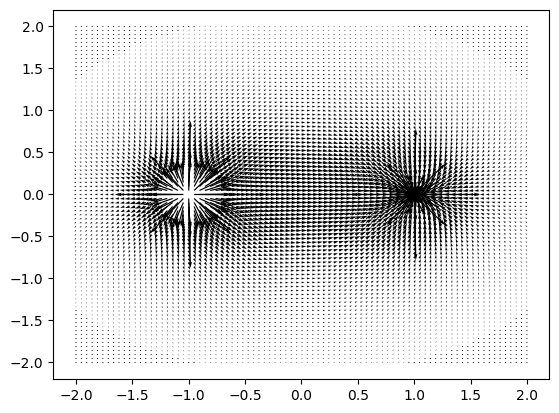

In [119]:
plt.quiver(x, y, Ex, Ey, scale=150)

#### Representation of the angles used in calculating the field:

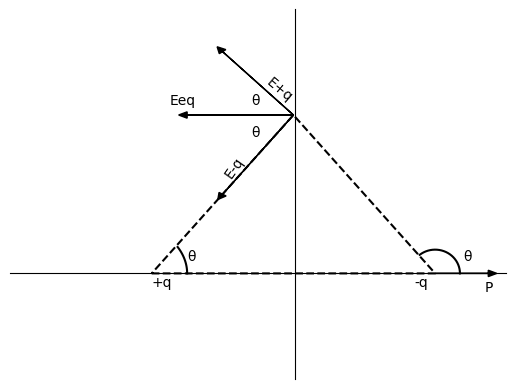

In [120]:
from numpy import linspace, cos, sin

def axes():
    fig = plt.figure('electric dipole')
    ax = fig.add_subplot(1, 1, 1)
    ax.axis('on')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines.left.set_position(('axes', 0.575))
    ax.spines.bottom.set_position('zero')
    ax.spines.top.set_color('none')
    ax.spines.right.set_color('none')
    plt.xlim([-2, 5])
    plt.ylim([-2, 5])


def dipole():
    x = np.array([0, 4, 2, 0])
    y = np.array([0, 0, 3, 0])
    plt.plot(x, y, color=[0 / 255, 0 / 255, 0 / 255], linestyle="--")

    plt.text(0, -.25, '+q')
    plt.text(3.7, -.25, '-q')
    plt.text(4.7, -0.35, 'P')


def field_vectors():
    plt.arrow(4, 0, 0.75, 0, head_width=.12, head_length=.12, color=[0 / 255, 0 / 255, 0 / 255])
    plt.arrow(2, 3, -1.5, 0, head_width=.12, head_length=.12, color=[0 / 255, 0 / 255, 0 / 255])
    plt.arrow(2, 3, -1, -1.5, head_width=.12, head_length=.12, color=[0 / 255, 0 / 255, 0 / 255])
    plt.arrow(2, 3, -1, 1.2, head_width=.12, head_length=.12, color=[0 / 255, 0 / 255, 0 / 255])

    plt.text(1.12, 1.8, 'E-q', rotation=55, rotation_mode='anchor')
    plt.text(0.25, 3.2, 'Eeq')
    plt.text(1.6, 3.6, 'E+q', rotation=-40, rotation_mode='anchor')


def angles():
    theta1 = linspace(0, np.pi / 6, 25)
    theta_x = cos(theta1)
    theta_y = sin(theta1)
    plt.plot(theta_x + -.5, theta_y, color='black')
    plt.text(4.4, 0.248, 'θ')

    theta2 = linspace(2 * np.pi / 2.8, 0, 25)
    theta_x2 = cos(theta2)
    theta_y2 = sin(theta2)
    plt.plot(theta_x2 * 0.35 + 4, theta_y2 * 0.45, color='black')
    plt.text(0.5, 0.248, 'θ')

    plt.text(1.4, 3.2, 'θ')
    plt.text(1.4, 2.6, 'θ')


def main():
    axes()
    dipole()
    field_vectors()
    angles()

    plt.show()


if __name__ == "__main__":
    main()

The axial charges lie at flat angles, where vertical components $ Esin\theta $ cancel, leaving $ 2Ecos\theta.$ From the diagram, we see that
$ \\ acos(\frac{x-a}{r1}) \implies cos\theta_1 = \frac{x-a}{r_1} , cos\theta_2 = \frac{x+a}{r_2}. $
 The distances between the two points are represented by r, where
$ r_1^2 = (x-a)^2 + y^2 $ and $ r_2^2 = (x+a)^2 + y^2 $.

##### We can alternatively calculate the electric field for the axial point as follows:

In [121]:
def dipole_electric_field(q, a, x, y):
    
    k = 1 / (4 * np.pi * 8.85E-12)
    x = a/2
    r = np.sqrt((x)**2 + y**2)
    cos_theta = x / r
    
    E = k * q / (x**2 + y**2)
    
    E1x = E * cos_theta
    E2x = E1x
    
    Ex = E1x + E2x #2Ecosθ
    Ey = 0
    
    print(f"Ex = {Ex} and Ey = {Ey}. Net electric field = E = {Ex}i\u0302 + {Ey} j\u0302")

In [122]:
field = dipole_electric_field(-1E-9, 0.10, 0.01, 0.01)

Ex = -6782.453786901375 and Ey = 0. Net electric field = E = -6782.453786901375î + 0 ĵ


Compare with our calculations for the electric field in the horizontal components: $ E_{1} = k\frac{q}{r^2}, $ where $ cos\theta = \frac{x}{r} \implies r = \sqrt{x^2+y^2} \\ $
$ \implies E_{1x} = k\frac{q}{r^2}cos\theta = k\frac{q}{r^2}\frac{x}{r} = k\frac{q}{(x^2+y^2)}\frac{x}{\sqrt{x^2+y^2}} $
and 
$ E_{2x} = \frac{kqx}{(x^2+y^2)^{3/2}} $

$ \sum\vec{E}_x = \frac{kqx}{(x^2+y^2)^{3/2}} $, which is our equation for the electric field felt by a point axial to the dipole.
